# Data cleaning

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
rename_cols = ["timestamp",	"ug_pg",	"faculties",	"num_majors",	"year_study",	"response_email",	"dom_int",	"commute_time",\
               	"days_on_campus",	"num_clubs_socs",	"avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	\
                "rank_fnb",	"rank_clubs_soc",	"rank_other",	"enj_soc_club",	"not_join_club",	"not_cont_club",\
                "usu_club_join",	"likely_involved_club",	"optimal_time",	"avg_hours_campus_non_study",	"reason_event_choose",	'rboe_club_soc']
data = pd.read_csv("data/survey_draft.csv", names = rename_cols, header = None)
data.drop(columns = ["timestamp", "response_email"])
print("done")

data["club_0"] = data["num_clubs_socs"] == "0"

done


# Looking at general information to see trends and hypothesis in Non active/active members of usyd campus 

## Breakdown of non active members in Undergrad and postgrad course

In [2]:
club_counts_by_ug_pg = data.groupby('ug_pg')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_ug_pg.columns = ['ug_pg', 'num_zero_clubs', 'total_count']
club_counts_by_ug_pg['num_non_zero_clubs'] = club_counts_by_ug_pg['total_count'] - club_counts_by_ug_pg['num_zero_clubs']
club_counts_by_ug_pg = club_counts_by_ug_pg[['ug_pg', 'num_zero_clubs', 'num_non_zero_clubs']]

club_counts_by_ug_pg

,ug_pg,num_zero_clubs,num_non_zero_clubs
0,Postgraduate,1,7
1,Undergraduate,17,58


## Breakdown of non active and active members by Faculties

In [3]:
club_counts_by_fac = data.groupby('faculties')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_fac.columns = ['faculties', 'num_zero_clubs', 'total_count']
club_counts_by_fac['num_non_zero_clubs'] = club_counts_by_fac['total_count'] - club_counts_by_fac['num_zero_clubs']
club_counts_by_fac = club_counts_by_fac[['faculties', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_fac 

,faculties,num_zero_clubs,num_non_zero_clubs
0,Arts and Social Sciences,4,11
1,Faculty of Engineering,0,12
2,"Faculty of Engineering, Sydney Law School",1,1
3,"Faculty of Engineering, University of Sydney B...",1,2
4,Faculty of Medicine and Health,0,6
5,Faculty of Science,3,14
6,"Faculty of Science, Faculty of Engineering",1,3
7,"Faculty of Science, Faculty of Medicine and He...",1,3
8,"Sydney School of Architecture, Design & Planning",0,3
9,"Sydney School of Architecture, Design & Planning",0,1


## Breakdown of non active and active members by number of majors

In [4]:
club_counts_by_maj = data.groupby('num_majors')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_maj.columns = ['num_majors', 'num_zero_clubs', 'total_count']
club_counts_by_maj['num_non_zero_clubs'] = club_counts_by_maj['total_count'] - club_counts_by_maj['num_zero_clubs']
club_counts_by_maj = club_counts_by_maj[['num_majors', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_maj 

,num_majors,num_zero_clubs,num_non_zero_clubs
0,1,10,39
1,2,8,26


## Breakdown of non active and active members by year

In [5]:
club_counts_by_year = data.groupby('year_study')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_year.columns = ['year_study', 'num_zero_clubs', 'total_count']
club_counts_by_year['num_non_zero_clubs'] = club_counts_by_year['total_count'] - club_counts_by_year['num_zero_clubs']
club_counts_by_year = club_counts_by_year[['year_study', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_year

,year_study,num_zero_clubs,num_non_zero_clubs
0,1st,2,13
1,2nd,0,14
2,3rd,12,17
3,4th,4,12
4,5th,0,8
5,6th,0,1


## Breakdown of non active and active members by domestic/international

In [6]:
club_counts_by_dom = data.groupby('dom_int')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_dom.columns = ['dom_int', 'num_zero_clubs', 'total_count']
club_counts_by_dom['num_non_zero_clubs'] = club_counts_by_dom['total_count'] - club_counts_by_dom['num_zero_clubs']
club_counts_by_dom = club_counts_by_dom[['dom_int', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_dom

,dom_int,num_zero_clubs,num_non_zero_clubs
0,Domestic,9,38
1,International,9,27


## Breakdown of non active and active members by commute time 


In [7]:
club_counts_by_ct = data.groupby('commute_time')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_ct.columns = ['commute_time', 'num_zero_clubs', 'total_count']
club_counts_by_ct['num_non_zero_clubs'] = club_counts_by_ct['total_count'] - club_counts_by_ct['num_zero_clubs']
club_counts_by_ct = club_counts_by_ct[['commute_time', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_ct

,commute_time,num_zero_clubs,num_non_zero_clubs
0,1 hr - 1.5 hr,4,8
1,30 min - 1 hr,4,31
2,< 30 min,8,25
3,>1.5 hr,1,0
4,Live on campus,1,1


## Breakdown of non active and active members by days on campus

In [8]:
club_counts_by_doc = data.groupby('days_on_campus')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_doc.columns = ['days_on_campus', 'num_zero_clubs', 'total_count']
club_counts_by_doc['num_non_zero_clubs'] = club_counts_by_doc['total_count'] - club_counts_by_doc['num_zero_clubs']
club_counts_by_doc = club_counts_by_doc[['days_on_campus', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_doc

,days_on_campus,num_zero_clubs,num_non_zero_clubs
0,1,0,3
1,2,7,14
2,3,9,22
3,4,1,17
4,5,1,9


# non active members trends

In [9]:
nam = data[data["club_0"]==True]
nam = nam[["dom_int","commute_time","avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	
           "rank_fnb",	"rank_clubs_soc", "rank_other","enj_soc_club",	"not_join_club",	"not_cont_club"]].copy()\
            .reset_index()[["dom_int","commute_time","avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	
           "rank_fnb",	"rank_clubs_soc","rank_other", "enj_soc_club",	"not_join_club",	"not_cont_club"]]


dom/ints and commute time 

In [10]:
commute_dom_int_counts = nam.groupby('commute_time')['dom_int'].value_counts().unstack(fill_value=0)
commute_dom_int_counts = commute_dom_int_counts.reset_index()
commute_dom_int_counts

dom_int,commute_time,Domestic,International
0,1 hr - 1.5 hr,3,1
1,30 min - 1 hr,2,2
2,< 30 min,3,5
3,>1.5 hr,1,0
4,Live on campus,0,1


dom_int and avg time

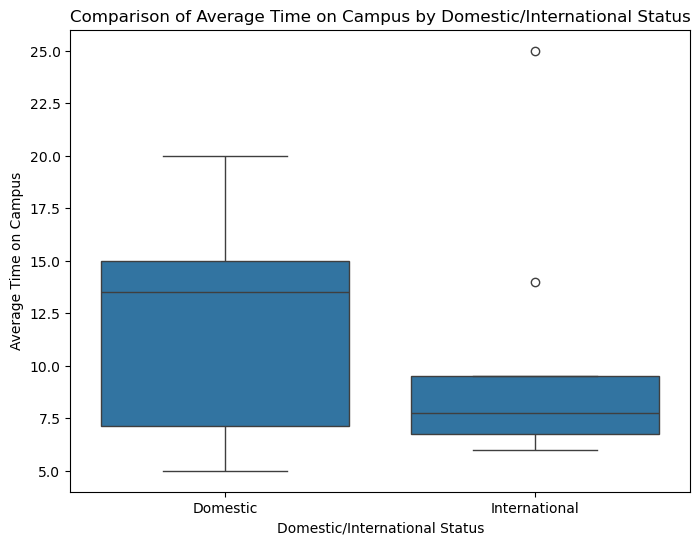

In [11]:
dom_int_avg_time = nam[["dom_int","avg_time_campus"]].dropna()

plt.figure(figsize=(8, 6))
sns.boxplot(x='dom_int', y='avg_time_campus', data=dom_int_avg_time)
plt.title('Comparison of Average Time on Campus by Domestic/International Status')
plt.xlabel('Domestic/International Status')
plt.ylabel('Average Time on Campus')
plt.show()


dom int and rank lect/tut  

In [12]:
dom_int_rnk_lec = nam.groupby("rank_lec_tuts")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_lec

dom_int,Domestic,International
rank_lec_tuts,,
1.0,6,4
4.0,0,1
5.0,0,1
6.0,3,3


dom/int and study/assignments

In [13]:
dom_int_rnk_study = nam.groupby("rank_study_amts")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_study

dom_int,Domestic,International
rank_study_amts,,
1.0,0,1
2.0,3,2
3.0,3,3
4.0,1,0
5.0,2,1
6.0,0,2


dom/ints and friends

In [14]:
dom_int_rnk_f = nam.groupby("rank_friends")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_f

dom_int,Domestic,International
rank_friends,,
1.0,0,1
2.0,1,3
3.0,4,4
4.0,1,1
5.0,1,0
6.0,2,0


dom/ints and food and beverages 

In [15]:
dom_int_rnk_fnb = nam.groupby("rank_fnb")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_fnb

dom_int,Domestic,International
rank_fnb,,
1.0,1,1
2.0,2,2
3.0,1,1
4.0,4,3
5.0,1,2


dom/int and clubs and socs

In [16]:
dom_int_rnk_cs = nam.groupby("rank_clubs_soc")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_cs

dom_int,Domestic,International
rank_clubs_soc,,
1.0,1,0
2.0,3,2
3.0,0,1
4.0,1,2
5.0,4,1
6.0,0,3


dom/int and others  

In [17]:
dom_int_rnk_cs = nam.groupby("rank_other")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_cs

dom_int,Domestic,International
rank_other,,
1.0,1,2
3.0,1,0
4.0,2,2
5.0,1,4
6.0,4,1


dom/ints and enjoy club and society 

In [18]:
dom_int_enjoy = nam.groupby("enj_soc_club")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_enjoy

dom_int,Domestic,International
enj_soc_club,,
No,2,3
Unsure,3,3
Yes,4,3


dom/int and not_join_club

In [19]:
dom_int_njc = nam.groupby("not_join_club")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_njc

dom_int,Domestic,International
not_join_club,,
Academic Commitments,0,2
Commute/Location,2,1
Cost,1,0
Lack of Social Opportunities,2,2
Not Interested,4,4


not_cont_club and dom/int

In [20]:
dom_int_ncc = nam.groupby("not_cont_club")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_ncc

dom_int,Domestic,International
not_cont_club,,
Academic Commitments,0,1
"Academic Commitments, Cost, Loss of Interest",1,0
Commute/Location,1,0
"Commute/Location, Cost",1,0
"Commute/Location, Lack of Social Opportunities",0,1
"Commute/Location, Lack of Social Opportunities, Academic Commitments, Loss of Interest",0,1
"Commute/Location, Loss of Interest",1,0
Cost,1,0
Lack of Social Opportunities,2,1


# Active members

## getting data

In [21]:
am = data[data["club_0"]==False]
am = am[["dom_int","commute_time","num_clubs_socs","usu_club_join","likely_involved_club","optimal_time","avg_hours_campus_non_study","reason_event_choose"]]\
        .reset_index()[["dom_int","num_clubs_socs","commute_time","usu_club_join","likely_involved_club","optimal_time","avg_hours_campus_non_study","reason_event_choose"]]


dom/int and commute time    

In [22]:
am_commute_dom_int_counts = am.groupby('commute_time')['dom_int'].value_counts().unstack(fill_value=0)
am_commute_dom_int_counts

dom_int,Domestic,International
commute_time,,
1 hr - 1.5 hr,8,0
30 min - 1 hr,23,8
< 30 min,7,18
Live on campus,0,1


dom/int and number of clubs joined 

In [23]:
am_dom_int_num_club = am.groupby('num_clubs_socs')['dom_int'].value_counts().unstack(fill_value=0)
am_dom_int_num_club

dom_int,Domestic,International
num_clubs_socs,,
1,13,8
2,12,5
3,7,8
4,2,3
5,1,1
6+,3,2


dom int and likely involvement

In [24]:
am_dom_int_lic = am.groupby('likely_involved_club')['dom_int'].value_counts().unstack(fill_value=0)
am_dom_int_lic

dom_int,Domestic,International
likely_involved_club,,
Extremely likely,5,4
Not likely,1,1
Not very likely,5,1
Somewhat likely,19,19
Very likely,8,2


dom/int and optimal_time

In [25]:
am_dom_int_lic = am.groupby('optimal_time')['dom_int'].value_counts().unstack(fill_value=0)
am_dom_int_lic

dom_int,Domestic,International
optimal_time,,
Weekday evenings,28,16
Weekday mid-day,8,9
Weekends,2,2


dom/int and avg_hours_campus_non_study

In [26]:
am_dom_int_ahcns = am.groupby('avg_hours_campus_non_study')['dom_int'].value_counts().unstack(fill_value=0)
am_dom_int_ahcns

dom_int,Domestic,International
avg_hours_campus_non_study,,
0.0,4,1
0.5,0,3
1.0,1,4
2.0,8,2
3.0,3,2
3.5,0,1
4.0,3,2
5.0,7,2
6.0,3,1


dom int and "reason_event_choose"

In [27]:
am_dom_int_rec = am.groupby('reason_event_choose')['dom_int'].value_counts().unstack(fill_value=0)
am_dom_int_rec

dom_int,Domestic,International
reason_event_choose,,
Academic/Career Insights,5,1
Commute/Location,8,4
Food and Beverages,6,5
Social Opportunities,18,17
Time and day.,1,0
